In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Loading dataset
# Assuming data is in a CSV file
df = pd.read_csv('all_stocks_5yr.csv')

# Extract relevant numerical columns for factorization
numerical_columns = ['open', 'high', 'low', 'close', 'volume']

# Extract date column separately
dates = df['date']

# Drop non-numeric columns
df_numeric = df[numerical_columns]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=numerical_columns)

# Standardize the numeric columns (important for SVD)
scaler = StandardScaler()
df_numeric_standardized = pd.DataFrame(scaler.fit_transform(df_numeric_imputed), columns=numerical_columns)

# Apply matrix factorization using Truncated SVD
n_components = 3
svd = TruncatedSVD(n_components=n_components)
matrix_factors = svd.fit_transform(df_numeric_standardized)

# Reconstruct the matrix using the factors
reconstructed_matrix = np.dot(matrix_factors, svd.components_)

# Convert the reconstructed matrix back to a DataFrame
reconstructed_df = pd.DataFrame(reconstructed_matrix, columns=numerical_columns)

# Add the date column back to the DataFrame
reconstructed_df['date'] = dates

# Displaying results
print(reconstructed_df)


            open      high       low     close    volume        date
0      -0.698075 -0.699256 -0.700061 -0.701542  0.469964  2013-02-08
1      -0.699832 -0.701544 -0.702593 -0.704744  0.524545  2013-02-11
2      -0.704546 -0.705158 -0.705731 -0.706497  0.437584  2013-02-12
3      -0.704783 -0.703396 -0.703541 -0.701815  0.682995  2013-02-13
4      -0.701012 -0.703863 -0.708167 -0.711891  3.169931  2013-02-14
...          ...       ...       ...       ...       ...         ...
619035 -0.062130 -0.058641 -0.057256 -0.052873 -0.154085  2018-02-01
619036 -0.055105 -0.058269 -0.059141 -0.063092 -0.198611  2018-02-02
619037 -0.066068 -0.078227 -0.082260 -0.097484 -0.156404  2018-02-05
619038 -0.102781 -0.101469 -0.101073 -0.099429  0.069309  2018-02-06
619039 -0.101783 -0.098077 -0.096803 -0.092158  0.024516  2018-02-07

[619040 rows x 6 columns]


In [2]:
import matplotlib.pyplot as plt

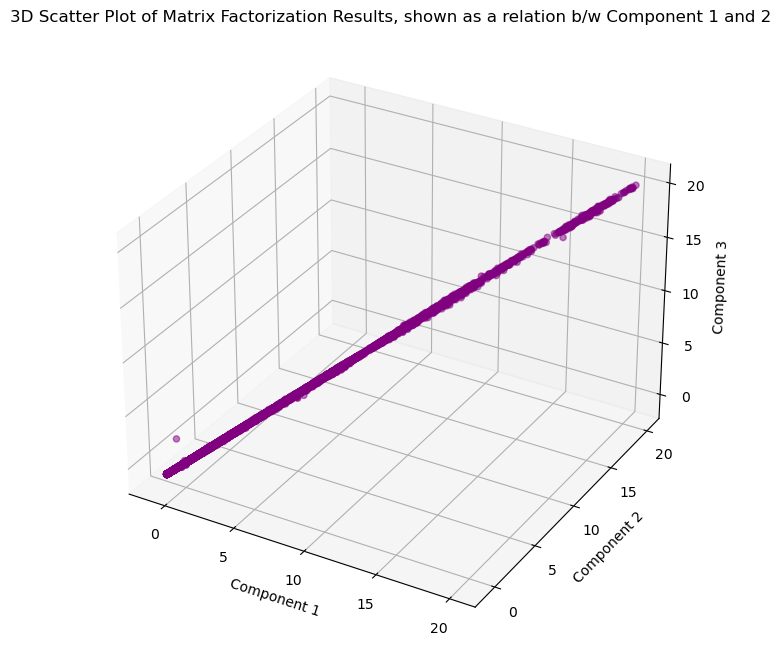

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract the first three components
component_1 = reconstructed_df.iloc[:, 0]
component_2 = reconstructed_df.iloc[:, 1]
component_3 = reconstructed_df.iloc[:, 2]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(component_1, component_2, component_3, c='purple', marker='o', alpha=0.5)

# Set axis labels
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('3D Scatter Plot of Matrix Factorization Results, shown as a relation b/w Component 1 and 2')

# Show the plot
plt.show()


In [4]:
# Print the components
print(svd.components_)


[[ 4.97786907e-01  4.97782865e-01  4.97803366e-01  4.97786104e-01
  -9.39213411e-02]
 [ 4.70217974e-02  4.74225265e-02  4.64768706e-02  4.69214646e-02
   9.95579395e-01]
 [-6.65249055e-01 -1.27262128e-01  5.92315181e-02  7.33307335e-01
   1.56238784e-04]]
